In [22]:
from mat4py import loadmat
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
data = loadmat('emnist-digits-150.mat')
images = data["dataset"]["DigitImage"]["images"]
labels = data["dataset"]["DigitImage"]["labels"]
number_of_data = len(images)

In [23]:
import numpy as np

def binarize_image(image: np.array):
    zero_indexs = np.where(image < 128)
    one_indexs = np.where(image >= 128)
    image[zero_indexs] = 0
    image[one_indexs] = 1
    return image
def iou(first_image: np.array, second_image: np.array):
    intersection = np.dot(first_image, second_image).sum()
    union = (first_image==1).sum() + (second_image==1).sum() - intersection
    # print(intersection, union)
    return intersection / union



### IoU Similarity

In [24]:
similarity_matrix = []
for i in range(number_of_data):
    one_image_similarity = []
    for j in range(number_of_data):
        first_image_binary, second_image_binary = binarize_image(np.array(images[i])) , binarize_image(np.array(images[j])) 
        similarity = np.round(iou(first_image_binary, second_image_binary),4)

        one_image_similarity.append(similarity)
    similarity_matrix.append(one_image_similarity)

np.array(similarity_matrix)


array([[1.    , 0.1608, 0.2445, ..., 0.1777, 0.1638, 0.1154],
       [0.1608, 1.    , 0.3827, ..., 0.1793, 0.2242, 0.0905],
       [0.2445, 0.3827, 1.    , ..., 0.2363, 0.2386, 0.1891],
       ...,
       [0.1777, 0.1793, 0.2363, ..., 1.    , 0.1322, 0.055 ],
       [0.1638, 0.2242, 0.2386, ..., 0.1322, 1.    , 0.1608],
       [0.1154, 0.0905, 0.1891, ..., 0.055 , 0.1608, 1.    ]])

### Transitivity Closure

In [25]:
R = similarity_matrix
while(True):
    R_dot = []
    for i in range(number_of_data):
        row = []
        for j in range(number_of_data):
            rel = []
            for k in range(number_of_data):
                rel.append(min(R[i][k], R[k][j]))
            row.append(max(rel))
        R_dot.append(row)
    R_prime = []
    for i in range(number_of_data):
        temp = []
        for j in range(number_of_data):
            temp.append (max(R[i][j], R_dot[i][j]))
        R_prime.append(temp)
    if R_prime == R:
        break
    R = R_prime
similarity_matrix = R_prime
np.array(similarity_matrix)

array([[1.    , 0.4464, 0.4464, ..., 0.3693, 0.4464, 0.4464],
       [0.4464, 1.    , 0.4961, ..., 0.3693, 0.4625, 0.4854],
       [0.4464, 0.4961, 1.    , ..., 0.3693, 0.4625, 0.4854],
       ...,
       [0.3693, 0.3693, 0.3693, ..., 1.    , 0.3693, 0.3693],
       [0.4464, 0.4625, 0.4625, ..., 0.3693, 1.    , 0.4625],
       [0.4464, 0.4854, 0.4854, ..., 0.3693, 0.4625, 1.    ]])

### Check for alpha cuts

In [26]:
# alphas = [0.01*i for i in range(0, 100, 5)]
# alphas = [0.6, 0.61, 0.62, 0.63, 0.64, 0.66]
alphas = [0.3, 0.4, 0.5, 0.6, 0.7]


def cluster_a_list(input_list, alpha):
    viewed_images = []
    cluster_with_alpha = []
    # input_list = shuffle(input_list)
    for a in input_list:
        if a in viewed_images:
            continue
        set_cluster = [a]
        for b in input_list:
            if b in viewed_images or b==a:
                continue
            if similarity_matrix[a][b] >= alpha:
                set_cluster.append(b)
                viewed_images.append(b)

        cluster_with_alpha.append(set_cluster)
    return cluster_with_alpha
    
all_clustering = [[[1*i for i in range(number_of_data)]]]
for alpha in alphas:
    if len(all_clustering[-1]) >= 50:
        break
    new_cluster_set = []
    for list in all_clustering[-1]:
        if len(list) <= 10:
            new_cluster_set.append(list)
            continue
        returned_cluster = cluster_a_list(list, alpha)
        # not_good = False
        # number_of_one_cluster = 0
        # for return_cluster in returned_cluster:
        #     if len(return_cluster) <= 1:
        #         number_of_one_cluster += 1
        # if number_of_one_cluster <= len(return_cluster) // 1.5:
        #     new_cluster_set.append(list)
        #     continue
        # else:
        for i in range(len(returned_cluster)):
            new_cluster_set.append(returned_cluster[i])
    all_clustering.append(new_cluster_set)
print(len(all_clustering))
# for clustering in all_clustering:
#     print (clustering)

4


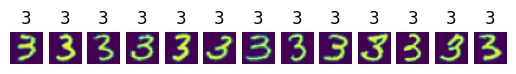

In [27]:
a = [6, 13, 33, 48, 57, 61, 73, 85, 107, 113, 129, 131, 140]
for image in a:
    plt.subplot(1, len(a), a.index(image)+1)
    plt.imshow((np.array(images[image]).reshape(28, 28).T))
    plt.title(labels[image][0])
    plt.axis("off")
plt.show()

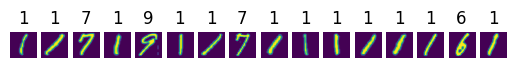

In [28]:
a = [7, 26, 36, 38, 39, 51, 53, 62, 65, 82, 95, 98, 103, 109, 115, 119]
for image in a:
    plt.subplot(1, len(a), a.index(image)+1)
    plt.imshow((np.array(images[image]).reshape(28, 28).T))
    plt.title(labels[image][0])
    plt.axis("off")
plt.show()

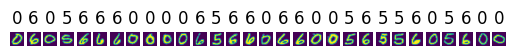

In [29]:
a = [8, 10, 19, 20, 25, 32, 49, 52, 59, 68, 69, 75, 78, 81, 83, 89, 94, 96, 102, 110, 111, 120, 121, 123, 130, 132, 135, 139, 144, 149]
for image in a:
    plt.subplot(1, len(a), a.index(image)+1)
    plt.imshow((np.array(images[image]).reshape(28, 28).T))
    plt.title(labels[image][0])
    plt.axis("off")
plt.show()

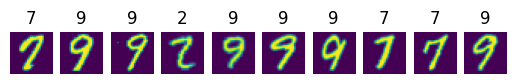

In [30]:

a = [2, 3, 22, 50, 70, 77, 90, 99, 104, 112]
for image in a:
    plt.subplot(1, len(a), a.index(image)+1)
    plt.imshow((np.array(images[image]).reshape(28, 28).T))
    plt.title(labels[image][0])
    plt.axis("off")
plt.show()

In [31]:
all_strings_output = ""
for i in range(len(all_clustering)-1):
    output_string = str(alphas[i]) + ": "
    number_of_claster = len(all_clustering[i+1])
    before_space = ((50 - (number_of_claster - 1)) // 2 ) * " "
    output_string += before_space
    cluster_points = ""
    # print(all_clustering[i+1])
    for cluster in all_clustering[i+1]:
        # print(cluster)
        cluster_points += (len(cluster)//2)* "_"
        cluster_points += " "
    output_string += cluster_points
    output_string += "\n \n"
    all_strings_output += output_string
# print(all_clustering[-1])
print(all_strings_output)


0.3:                         __________________________________________________________________________  
 
0.4:                 __________________________________________________________________                  
 
0.5:  _ _____  ______ ________ _______________  _       _   _   _               _ _    _        _                        
 

